In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\gayat\Downloads\Sales.csv"
data = pd.read_csv(file_path)

# Display the first five rows of the dataset
print(data.head())

# Display the column names
print(data.columns)

# Features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot actual vs predicted sales
colors_x = plt.cm.cool(np.linspace(0, 1, len(y_test)))  # Cool colormap based on x values
colors_y = plt.cm.autumn(np.linspace(0, 1, len(y_pred)))  # Autumn colormap based on y values



      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Mean Squared Error: 1.4374328500000009
Mean Absolute Error: 0.9179999999999993


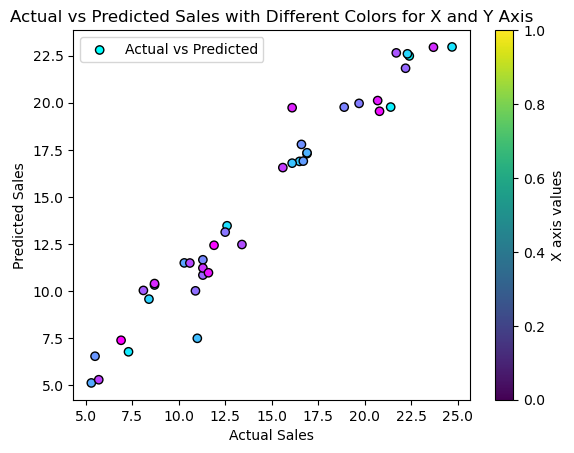

In [29]:
#Scatter Plot actual vs predicted sales 
plt.scatter(y_test, y_pred, c=colors_x, edgecolor='black', label='Actual vs Predicted')  # Using colors based on x values
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales with Different Colors for X and Y Axis')
plt.colorbar(label='X axis values')
plt.legend()
plt.show()



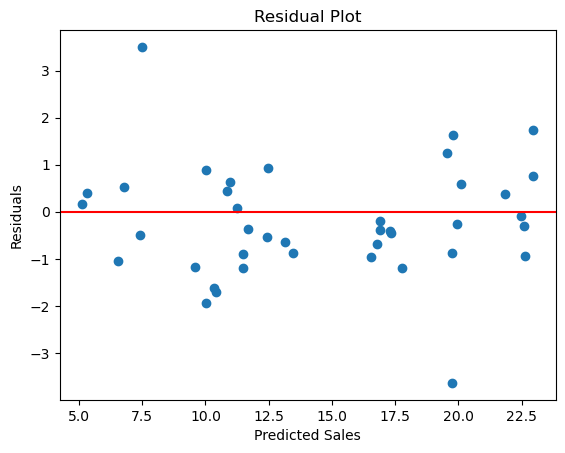

In [30]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


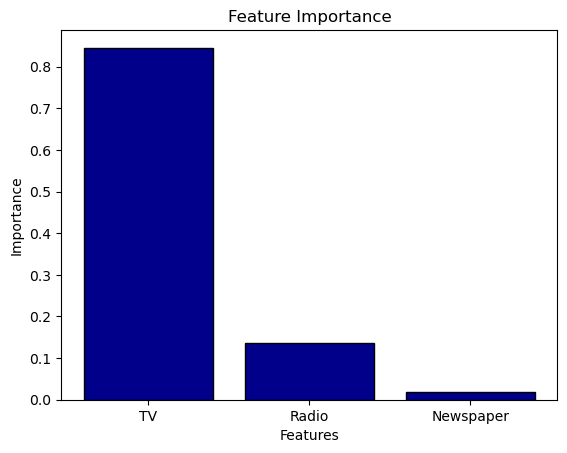

In [31]:
# Feature Importance Plot(bar plot)
feature_importance = model.feature_importances_
feature_names = X.columns
plt.bar(feature_names, feature_importance, color='darkblue', edgecolor='black')  # Set bar color to red and border color to black
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [32]:
#prediction of new data
new_data = pd.DataFrame({
    'TV': [10000, 15000],
    'Radio': [1000, 2000],
    'Newspaper': [500, 800]
})

#  predictions
predictions = model.predict(new_data)
print(f'Sales Predictions: {predictions}')


Sales Predictions: [26.062 26.062]
